<h1 style='color: darkcyan; font-size: 36px; font-weight: bold;'>WeatherPy Analysis</h1>

# <font color='teal' style='font-size: 20px;'>Trends Description:</font>
<hr style='border: 1.5px solid lightseagreen; background-color:#008b8b;'>
<ol style="line-height:33px; background-color:#008b8b; color:white; ">
  <li style="line-height:25px; text-align:justify; padding-top: 15px; padding-bottom: 10px;">For survival rate, again, Capomulin obtained the most satisfactory result among those four treatments, leading it with 84%.</li>  
  <li style="line-height:25px; text-align:justify; padding-top: 15px; padding-bottom: 10px;">For survival rate, again, Capomulin obtained the most satisfactory result among those four treatments, leading it with 84%.</li>  
  <li style="line-height:25px; text-align:justify; padding-top: 15px; padding-bottom: 15px;">For survival rate, again, Capomulin obtained the most satisfactory result among those four treatments, leading it with 84%.</li>  
</ol>
<hr style='border: 1.5px solid lightseagreen;'>


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import requests as req
import os, json, csv, time, random, datetime, time 
from config import api_key
from citipy import citipy

In [2]:
# Assign the Cities' file to a variable 
cities_file = os.path.join(".", "Resources", "cities.csv")

### Create a list of cities utilizing citipy library

In [3]:
# Create lists with the complete latitudes and longitudes to better analysis accuracy. 
lat = [y for y in range (-88, 93, 4)]
lng = [x for x in range (-178, 188, 10)]

# Store the cities in a collection/set. This way we be sure we won't have any duplication.
collection = set()
# Line terminator to append to each city
lineterminator = '\r\n'
# Looping combining Latitudes and Longitudes to get cities 
for y in lat:
    for x in lng:
        # Get coordinates randomicaly from a small range. 
        rand_y = random.uniform( (y-2), (y+2) )
        rand_x = random.uniform( (x-2), (x+2) )
        # Get the nearest city of current coordinates
        city = citipy.nearest_city(rand_y,rand_x)
        collection.add(f"{city.city_name},{city.country_code}{lineterminator}")
#         print(f"City: {city.city_name}, Country:{city.country_code}, coord: {y},{x}")

# Preview total of cities 
print(f"Total of distinct cities: {len(collection)}")

Total of distinct cities: 681


In [4]:
# Save the selected cities in a csv file.
with open(cities_file, 'w') as writeFile:
    # Write the header
    writeFile.write(f"City,Country{lineterminator}")
    # Write the cities
    writeFile.writelines(collection)        

In [5]:
# Read the cities file
cities = pd.read_csv(cities_file, sep=',')  
# Convert the selected cities to a DataFrame
df_cities = pd.DataFrame(cities)
# Preview the DataFrame
df_cities.head()

,City,Country
0,victoria,sc
1,shetpe,kz
2,ilebo,cd
3,bubaque,gw
4,mataura,pf


In [6]:
# Create new fields for city.
df_cities["Cloudiness"] = None
df_cities["Date"] = None
df_cities["Humidity"] = 0
df_cities["Lat"] = 0.0
df_cities["Lng"] = 0.0
df_cities["Max Temp"] = 0.0
df_cities["Wind Speed"] = 0.0

# Set units to get the temperature in fahrenheit
units = "imperial"

# Set the default URL.
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units={units}"

In [7]:
# Utilize Open Weather API to fill new fields. 
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")       

# Loop to execute requests for each city. 
count = 0 
for index, row in df_cities.iterrows(): 
    # Uncomment the two lines below to process just 20 cities. It will take more than 10 minutes to process all cities. 
#     if count == 20:
#         break
    count += 1
        
    # Add one second interval between requests to be in compliance with  Open Weather 
    # API guideline ("Free users can make 60 requests per minute").
    time.sleep(1) 

    # Build query URL for current city and print log.
    # Regarding we have cities with same name in different countries, we are appending 
    # country code to request the right city.
    city_country = f"{row['City']},{row['Country']}" 
    query_url = f"{url}&q={city_country}"
    print(f"Processing Record {count} - ({city_country.replace(',','/')})")
    print(query_url)
    
    try:
        # Run the request
        result = req.get(query_url).json()
        # Fill fields
        df_cities.loc[index, 'Cloudiness'] = result['clouds']['all']
        df_cities.loc[index, 'Date'] = datetime.datetime.fromtimestamp( int(result['dt']) ).strftime('%Y-%m-%d %H:%M:%S')
        df_cities.loc[index, 'Humidity'] = result['main']['humidity']
        df_cities.loc[index, 'Lat'] = result['coord']["lat"]
        df_cities.loc[index, 'Lng'] = result['coord']["lon"]
        df_cities.loc[index, 'Max Temp'] = result['main']['temp_max']
        df_cities.loc[index, 'Wind Speed'] = result['wind']['speed']
    except:    
        print(f"We've got an error when processing city={city_country} - {result}.")
        # Remove the city with error from DF.
        df_cities.drop([index],inplace=True)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")       
        
# Remove any City missing data
df_cities.dropna(how="any", inplace=True)  
# Reindex DF
df_cities.reset_index(drop=True, inplace=True)   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 - (victoria/sc)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=victoria,sc
Processing Record 2 - (shetpe/kz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=shetpe,kz
Processing Record 3 - (ilebo/cd)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ilebo,cd
Processing Record 4 - (bubaque/gw)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bubaque,gw
Processing Record 5 - (mataura/pf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mataura,pf
We've got an error when processing city=mataura,pf - {'cod': '404', 'message': 'city not found'}.
Processing Record 6 - (tuatapere/nz)
http://api.openweathermap.org/data/2.5/

Processing Record 48 - (lagos/pt)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=lagos,pt
Processing Record 49 - (fereydun kenar/ir)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=fereydun kenar,ir
Processing Record 50 - (egvekinot/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=egvekinot,ru
Processing Record 51 - (ust-tsilma/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ust-tsilma,ru
Processing Record 52 - (palabuhanratu/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=palabuhanratu,id
We've got an error when processing city=palabuhanratu,id - {'cod': '404', 'message': 'city not found'}.
Processing Record 53 - (ushuaia/ar)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b0

Processing Record 95 - (taybad/ir)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=taybad,ir
Processing Record 96 - (ponta do sol/cv)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ponta do sol,cv
Processing Record 97 - (norman wells/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=norman wells,ca
Processing Record 98 - (saint-augustin/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=saint-augustin,ca
Processing Record 99 - (panaba/mx)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=panaba,mx
Processing Record 100 - (nanyamba/tz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=nanyamba,tz
Processing Record 101 - (rikitea/pf)
http://api.openweathermap.org/

Processing Record 147 - (general roca/ar)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=general roca,ar
Processing Record 148 - (tautira/pf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tautira,pf
Processing Record 149 - (przhevalskoye/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=przhevalskoye,ru
Processing Record 150 - (kyshtym/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kyshtym,ru
Processing Record 151 - (balykshi/kz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=balykshi,kz
We've got an error when processing city=balykshi,kz - {'cod': '404', 'message': 'city not found'}.
Processing Record 152 - (urdzhar/kz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864

Processing Record 197 - (carnarvon/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=carnarvon,au
Processing Record 198 - (sept-iles/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sept-iles,ca
Processing Record 199 - (novoyegoryevskoye/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=novoyegoryevskoye,ru
We've got an error when processing city=novoyegoryevskoye,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 200 - (sampit/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sampit,id
Processing Record 201 - (jamestown/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=jamestown,us
Processing Record 202 - (cheuskiny/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e33801

Processing Record 246 - (deputatskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=deputatskiy,ru
Processing Record 247 - (bluff/nz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bluff,nz
Processing Record 248 - (banda aceh/id)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=banda aceh,id
Processing Record 249 - (barrow/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=barrow,us
Processing Record 250 - (silvan/tr)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=silvan,tr
Processing Record 251 - (zhanatas/kz)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zhanatas,kz
We've got an error when processing city=zhanatas,kz - {'cod': '404', 'message': 'city 

Processing Record 294 - (yuanping/cn)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=yuanping,cn
Processing Record 295 - (kieta/pg)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kieta,pg
Processing Record 296 - (mumford/gh)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mumford,gh
Processing Record 297 - (caibarien/cu)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=caibarien,cu
Processing Record 298 - (ardistan/ir)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ardistan,ir
We've got an error when processing city=ardistan,ir - {'cod': '404', 'message': 'city not found'}.
Processing Record 299 - (tukrah/ly)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tuk

Processing Record 342 - (san cristobal/ec)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=san cristobal,ec
Processing Record 343 - (toliary/mg)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=toliary,mg
We've got an error when processing city=toliary,mg - {'cod': '404', 'message': 'city not found'}.
Processing Record 344 - (senanga/zm)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=senanga,zm
Processing Record 345 - (clyde river/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=clyde river,ca
Processing Record 346 - (iqaluit/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=iqaluit,ca
Processing Record 347 - (olafsvik/is)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&uni

Processing Record 392 - (illoqqortoormiut/gl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=illoqqortoormiut,gl
We've got an error when processing city=illoqqortoormiut,gl - {'cod': '404', 'message': 'city not found'}.
Processing Record 393 - (burgeo/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=burgeo,ca
Processing Record 394 - (ucluelet/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ucluelet,ca
Processing Record 395 - (sahrak/af)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sahrak,af
We've got an error when processing city=sahrak,af - {'cod': '404', 'message': 'city not found'}.
Processing Record 396 - (reconquista/ar)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=reconquista,ar
Processing Record

Processing Record 440 - (faanui/pf)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=faanui,pf
Processing Record 441 - (zambezi/zm)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zambezi,zm
Processing Record 442 - (san sebastian/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=san sebastian,us
We've got an error when processing city=san sebastian,us - {'cod': '404', 'message': 'city not found'}.
Processing Record 443 - (islamabad/pk)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=islamabad,pk
Processing Record 444 - (hobyo/so)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=hobyo,so
Processing Record 445 - (tiznit/ma)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imp

Processing Record 490 - (hofn/is)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=hofn,is
Processing Record 491 - (beringovskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=beringovskiy,ru
Processing Record 492 - (swift current/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=swift current,ca
Processing Record 493 - (yeletskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=yeletskiy,ru
We've got an error when processing city=yeletskiy,ru - {'cod': '404', 'message': 'city not found'}.
Processing Record 494 - (zabid/ye)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=zabid,ye
Processing Record 495 - (cherskiy/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units

Processing Record 540 - (amarante do maranhao/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=amarante do maranhao,br
Processing Record 541 - (miri/my)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=miri,my
Processing Record 542 - (le vauclin/mq)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=le vauclin,mq
Processing Record 543 - (lermontovka/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=lermontovka,ru
Processing Record 544 - (ribeira grande/pt)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ribeira grande,pt
Processing Record 545 - (sorvag/fo)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=sorvag,fo
We've got an error when processing city=sorvag,f

Processing Record 587 - (mareeba/au)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=mareeba,au
Processing Record 588 - (bonthe/sl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bonthe,sl
Processing Record 589 - (ilulissat/gl)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=ilulissat,gl
Processing Record 590 - (tucuma/br)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tucuma,br
We've got an error when processing city=tucuma,br - {'cod': '404', 'message': 'city not found'}.
Processing Record 591 - (tungor/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tungor,ru
Processing Record 592 - (juifang/tw)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=juifang,tw

Processing Record 637 - (anchorage/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=anchorage,us
Processing Record 638 - (aklavik/ca)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=aklavik,ca
Processing Record 639 - (bozuyuk/tr)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=bozuyuk,tr
Processing Record 640 - (kargasok/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=kargasok,ru
Processing Record 641 - (tilichiki/ru)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=tilichiki,ru
Processing Record 642 - (steamboat springs/us)
http://api.openweathermap.org/data/2.5/weather?APPID=f5072ad53e338012bcc90c7b09683864&units=imperial&q=steamboat springs,us
Processing Record 643 - (san policarpo/ph)
http://api.openweathe

In [8]:
# Preview total cities remaining after requests.
print(f"Total cities remaining: {len(df_cities)}")

# Preview new fields filled
df_cities.head()

Total cities remaining: 575


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,victoria,sc,20,2019-07-04 13:13:53,83,-4.62,55.45,80.60,5.82
1,shetpe,kz,0,2019-07-04 13:13:55,29,44.14,52.16,84.83,6.29
2,ilebo,cd,38,2019-07-04 13:13:56,36,-4.33,20.59,78.35,1.28
3,bubaque,gw,48,2019-07-04 13:13:57,81,11.28,-15.83,80.69,9.71
4,tuatapere,nz,61,2019-07-04 13:13:59,95,-46.13,167.69,41.00,1.01


In [9]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 9 columns):
City          575 non-null object
Country       575 non-null object
Cloudiness    575 non-null int64
Date          575 non-null object
Humidity      575 non-null int64
Lat           575 non-null float64
Lng           575 non-null float64
Max Temp      575 non-null float64
Wind Speed    575 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.5+ KB


In [10]:
# Get the analysis date. It will be used on title graphs.
analisys_date = df_cities.loc[0:0]["Date"][0]
# Get just the date, cut hour, min, and sec out. 
analisys_date = analisys_date[0:10]
# Format date and convert to String
dt = datetime.datetime.strptime(analisys_date, '%Y-%m-%d')
analisys_date = dt.strftime("%B %d, %Y")

In [11]:
# Set graphs stile  
plt.style.use('fivethirtyeight')

# Create a function to set graphs
def set_graph(y_axis, y_lim, title, y_label, image_file_name):
    # Start graph
    fig, ax = plt.subplots(figsize=(9,6))
    fig.set_facecolor('w')

    # Set commom params for all graphs
    x_axis = df_cities["Lat"].tolist()    
    x_lim = [-80, 100]
    x_label = "Latitude"
    
    # Set x and y limits
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Set the title
    ax.set_title(f"{title} ({analisys_date})", alpha=0.9, fontsize=15)

    # Set labels
    ax.set_xlabel(x_label, alpha=0.8, fontsize=14)
    ax.set_ylabel(y_label, alpha=0.8, fontsize=14)

    # Set stick
    ax.tick_params(direction='out', length=0, width=2, grid_color='w', labelsize='small', grid_linewidth=1.2)
    ax.scatter(x_axis, y_axis, marker="o",color="blue",edgecolors='black', s=40, alpha=0.8)
    
    # Save the graph image
    plt.savefig(image_file_name)

### Latitude vs Max Temperature Plot

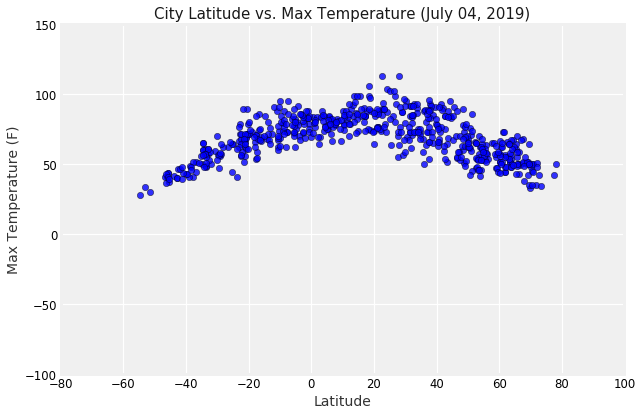

In [12]:
# Set the graph
set_graph(df_cities["Max Temp"].tolist(),     # y_axis
          [-100, 150],                        # ylim   
          "City Latitude vs. Max Temperature",# Title
          "Max Temperature (F)",              # yLabel
          "Latitude_vs_MaxTemperature.png")   # image_file_name

# Show the Figure
plt.show()

### Latitude vs. Humidity Plot

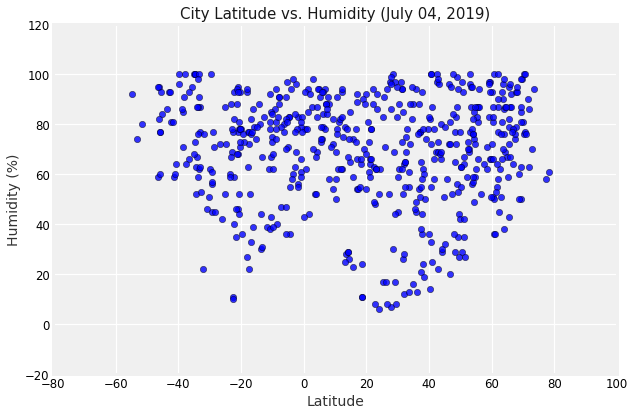

In [13]:
# Set graph
set_graph(df_cities["Humidity"].tolist(), # y_axis
          [-20, 120],                     # ylim   
          "City Latitude vs. Humidity",   # Title
          "Humidity (%)",                 # yLabel
          "Latitude_vs_Humidity.png")     # image_file_name

# Show the Figure
plt.show()

### Latitude vs. Cloudiness Plot

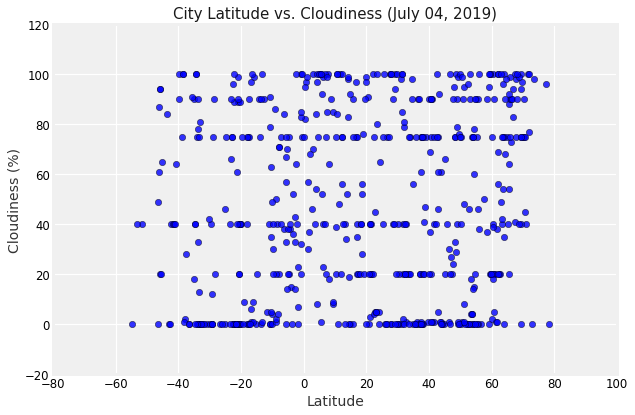

In [14]:
# Set graph
set_graph(df_cities["Cloudiness"].tolist(),# y_axis
          [-20, 120],                      # ylim   
          "City Latitude vs. Cloudiness",  # Title
          "Cloudiness (%)",                # yLabel
          "CityLatitude_vs_Cloudiness.png")# image_file_name

# Show the Figure
plt.show()


### Latitude vs. Wind Speed Plot

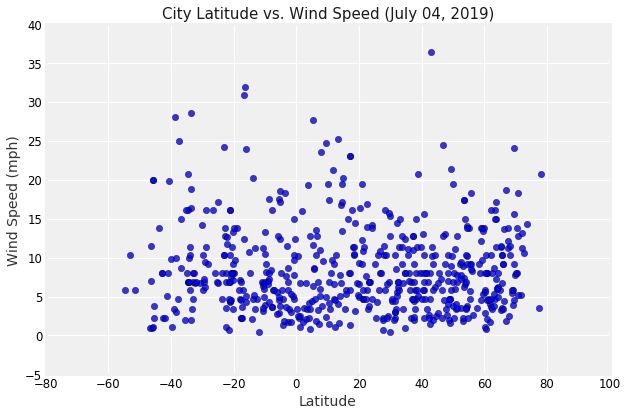

In [15]:
# Set graph
set_graph(df_cities["Wind Speed"].tolist(),# y_axis
          [-5, 40],                        # ylim   
          "City Latitude vs. Wind Speed",  # Title
          "Wind Speed (mph)",              # yLabel
          "Latitude_vs_WindSpeed.png")     # image_file_name

# Show the Figure
plt.show()

In [16]:
# Save Cities Data.
df_cities.to_csv(cities_file, encoding="utf-8", index=False)